# Compare Smooth throughput in January 2023 and remove abs lines

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : June 06 2023
- update : June 06th 2023

** Kernel anaconda3_auxtel**

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

## Config

In [3]:
abs_bands_dict = { "H2O_1" : [700,740], "H2O_2" : [800,840], "H2O_3" : [900,1000], "O2_1" : [760,765] }

In [4]:
!ls dataout

MLfit_bouguer_linearfit-20220630-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfit-2023-01-17-HD38666.csv
MLfit_bouguer_linearfit-2023-01-18-HD38666.csv
MLfit_bouguer_linearfit-2023-January-mucol.csv
MLfit_bouguer_linearfit-20230509-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_30nm_out.csv
MLfit_bouguer_linearfit-20230509-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfit-20230510-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfit-20230511-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfitsmoothGP-2023-January-mucol.csv


In [5]:
DATE = "2023-January"
FILTERTYPE = "empty~holo4_003"
SITE = "AUXTEL"
spectractormode = "psf2dffm"
ext = "rebin2"   # run BPS by removing ACQ
FLAG_POLAR = False
target = "mucol"
filename1 = "dataout/MLfit_bouguer_linearfit-2023-01-17-HD38666.csv"
filename2 = "dataout/MLfit_bouguer_linearfit-2023-01-18-HD38666.csv"

outputfile_linearfit = "MLfit_bouguer_linearfit-"

## Read file

In [6]:
df1 = pd.read_csv(filename1,index_col=0)
df2 = pd.read_csv(filename2,index_col=0)

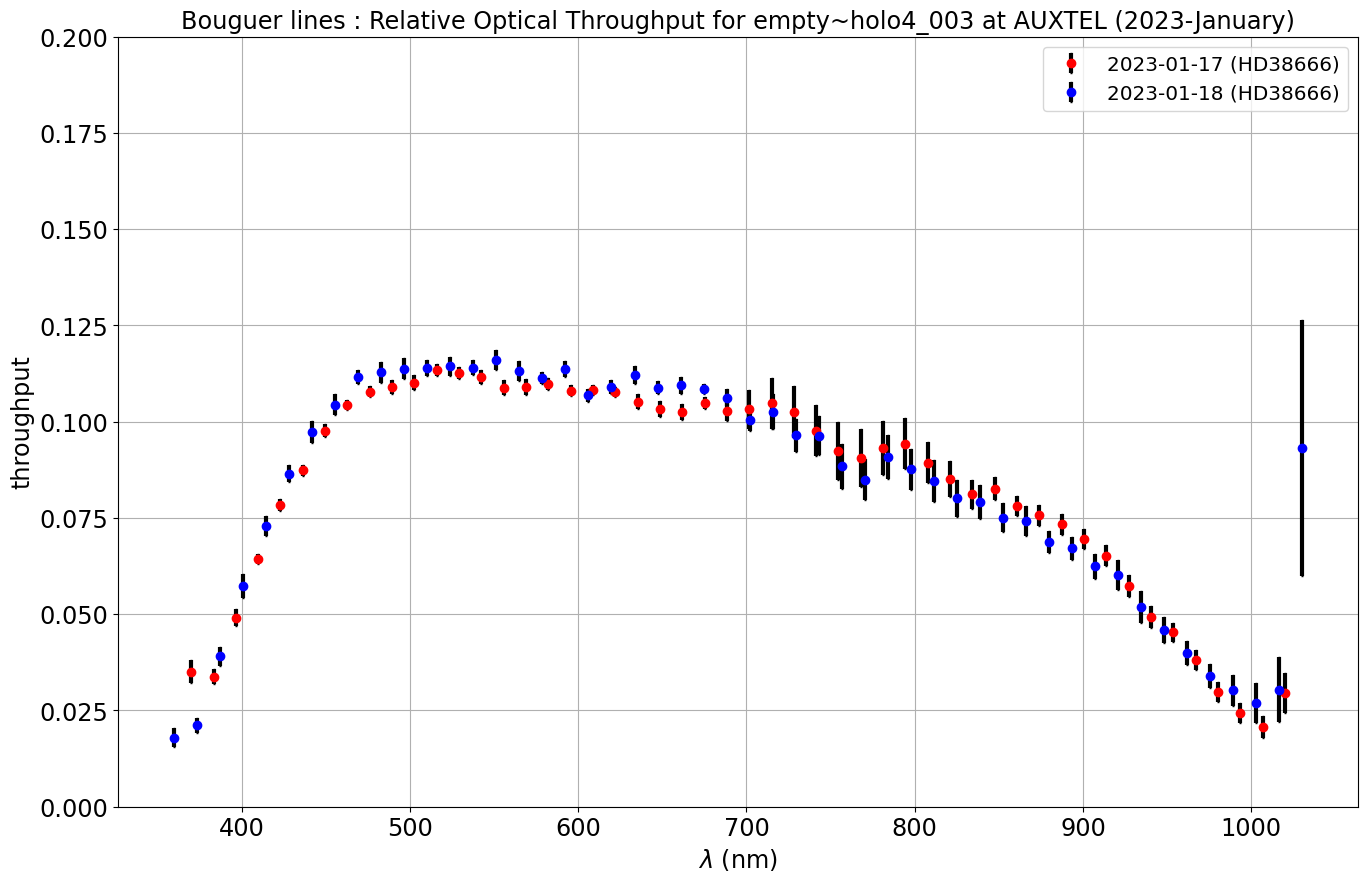

In [7]:
fig = plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

X1=df1["wavelength"].values
Y1=df1["throu"].values
EY1= df1["errthrou"].values

X2=df2["wavelength"].values
Y2=df2["throu"].values
EY2= df2["errthrou"].values


ax.errorbar(X1,Y1, yerr=EY1, xerr=None, fmt='o',color="r",ecolor="k", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.errorbar(X2,Y2, yerr=EY2, xerr=None, fmt='o',color="b",ecolor="k", elinewidth=3, capsize=1,label="2023-01-18 (HD38666)")

ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("throughput")
title=f"Bouguer lines : Relative Optical Throughput for {FILTERTYPE} at {SITE} ({DATE})"
ax.set_title(title)
ax.grid()
ax.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.set_ylim(0,0.2)
ax.legend()
        

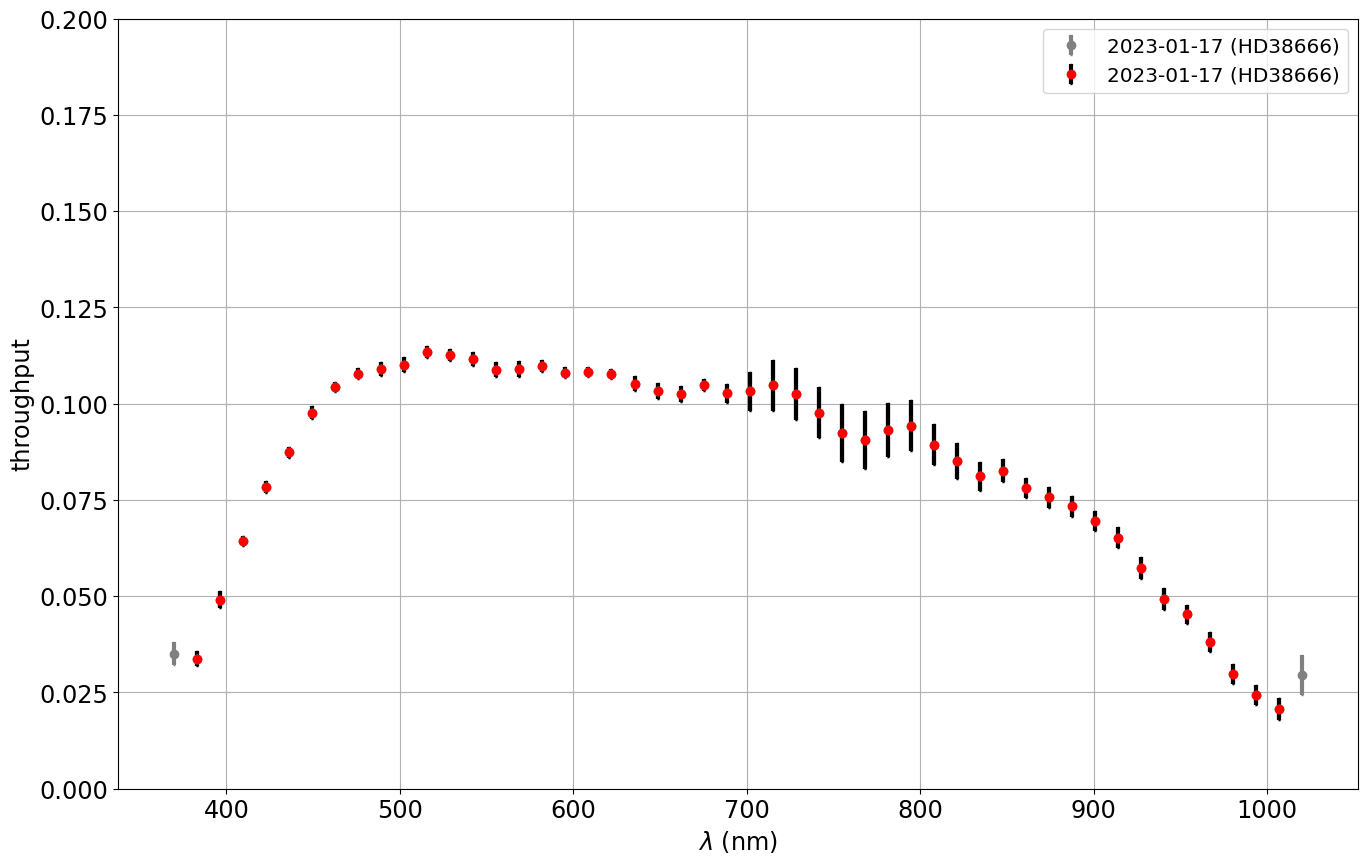

In [8]:
X1_clean = np.delete(X1, [0,-1])
Y1_clean = np.delete(Y1, [0,-1])
EY1_clean = np.delete(EY1, [0,-1])

fig = plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

ax.errorbar(X1,Y1, yerr=EY1, xerr=None, fmt='o',color="grey",ecolor="grey", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.errorbar(X1_clean,Y1_clean, yerr=EY1_clean, xerr=None, fmt='o',color="r",ecolor="k", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.grid()
ax.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.set_ylim(0,0.2)
ax.legend()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("throughput")
title=f"Bouguer lines : Relative Optical Throughput for {FILTERTYPE} at {SITE} ({DATE})"

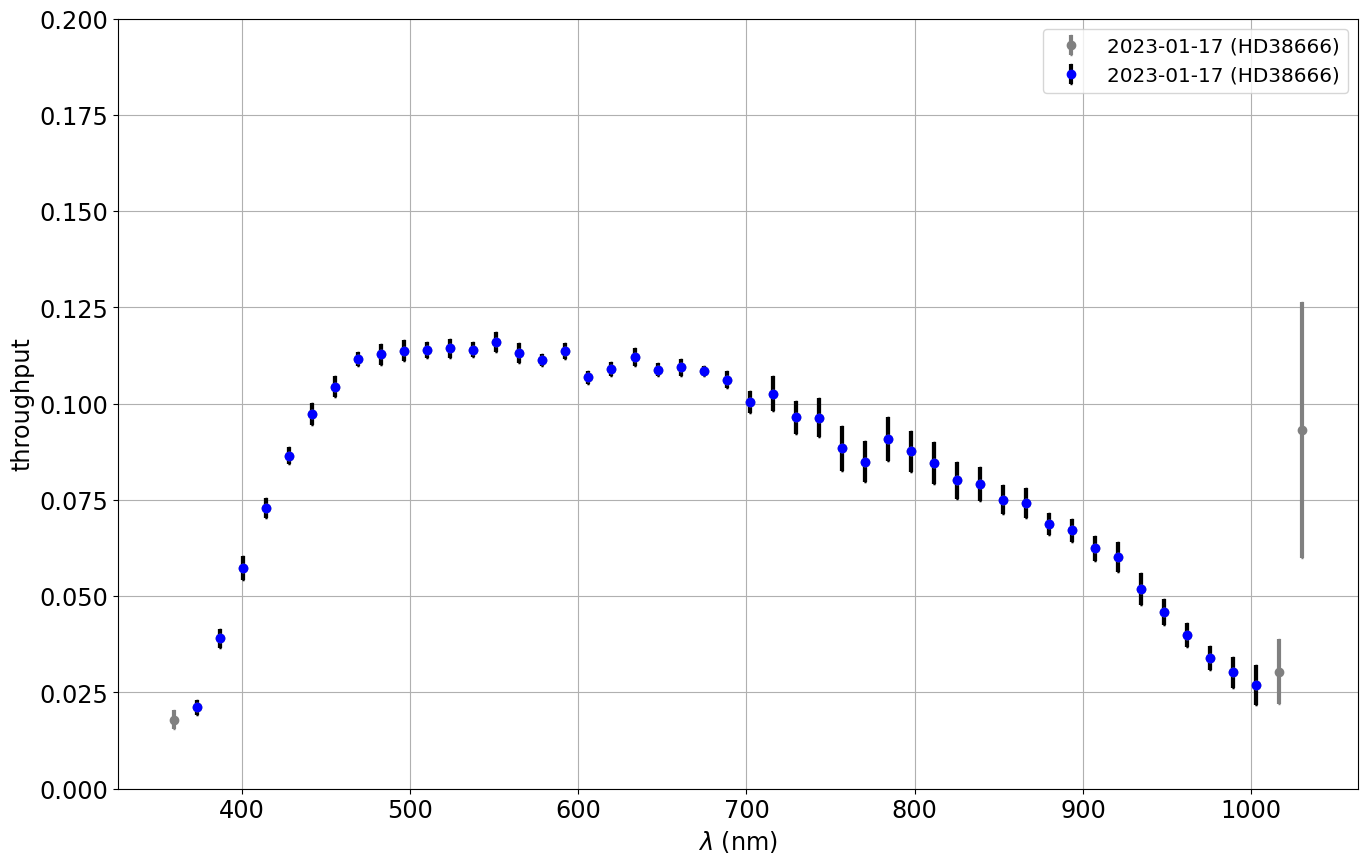

In [9]:
X2_clean = np.delete(X2, [0, -1,-2])
Y2_clean = np.delete(Y2, [0, -1,-2])
EY2_clean = np.delete(EY2, [0, -1,-2])

fig = plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

ax.errorbar(X2,Y2, yerr=EY2, xerr=None, fmt='o',color="grey",ecolor="grey", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.errorbar(X2_clean,Y2_clean, yerr=EY2_clean, xerr=None, fmt='o',color="b",ecolor="k", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.grid()
ax.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.set_ylim(0,0.2)
ax.legend()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("throughput")
title=f"Bouguer lines : Relative Optical Throughput for {FILTERTYPE} at {SITE} ({DATE})"

# Union of the cleaned

In [10]:
X = np.concatenate((X1_clean,X2_clean))
Y = np.concatenate((Y1_clean,Y2_clean))
EY = np.concatenate((EY1_clean,EY2_clean))

In [11]:
sorted_indexes = np.argsort(X)

In [12]:
X = X[sorted_indexes]
Y = Y[sorted_indexes]
EY = EY[sorted_indexes]

Text(0.5, 1.0, 'Bouguer lines : Relative Optical Throughput for empty~holo4_003 at AUXTEL (2023-January)')

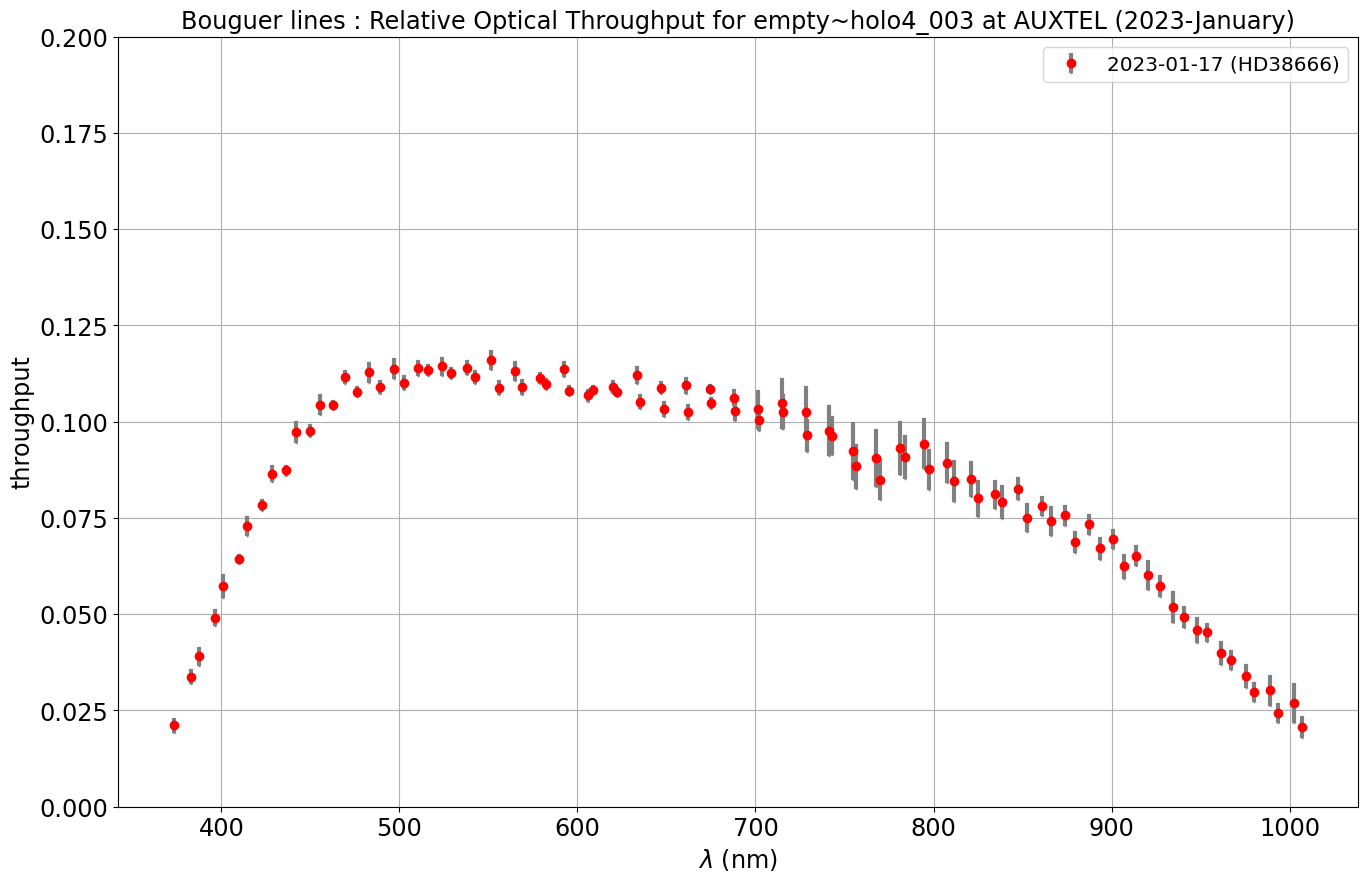

In [13]:
fig = plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

ax.errorbar(X,Y, yerr=EY, xerr=None, fmt='o',color="r",ecolor="grey", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.grid()
ax.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.set_ylim(0,0.2)
ax.legend()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("throughput")
title=f"Bouguer lines : Relative Optical Throughput for {FILTERTYPE} at {SITE} ({DATE})"
ax.set_title(title)

# Insert First element

In [14]:
X = np.insert(X,0,360.)
Y = np.insert(Y,0,0.01)
EY = np.insert(EY,0,EY.max())

X = np.insert(X,0,350.)
Y = np.insert(Y,0,0.)
EY = np.insert(EY,0,EY.max())

Text(0.5, 1.0, 'Bouguer lines : Relative Optical Throughput for empty~holo4_003 at AUXTEL (2023-January)')

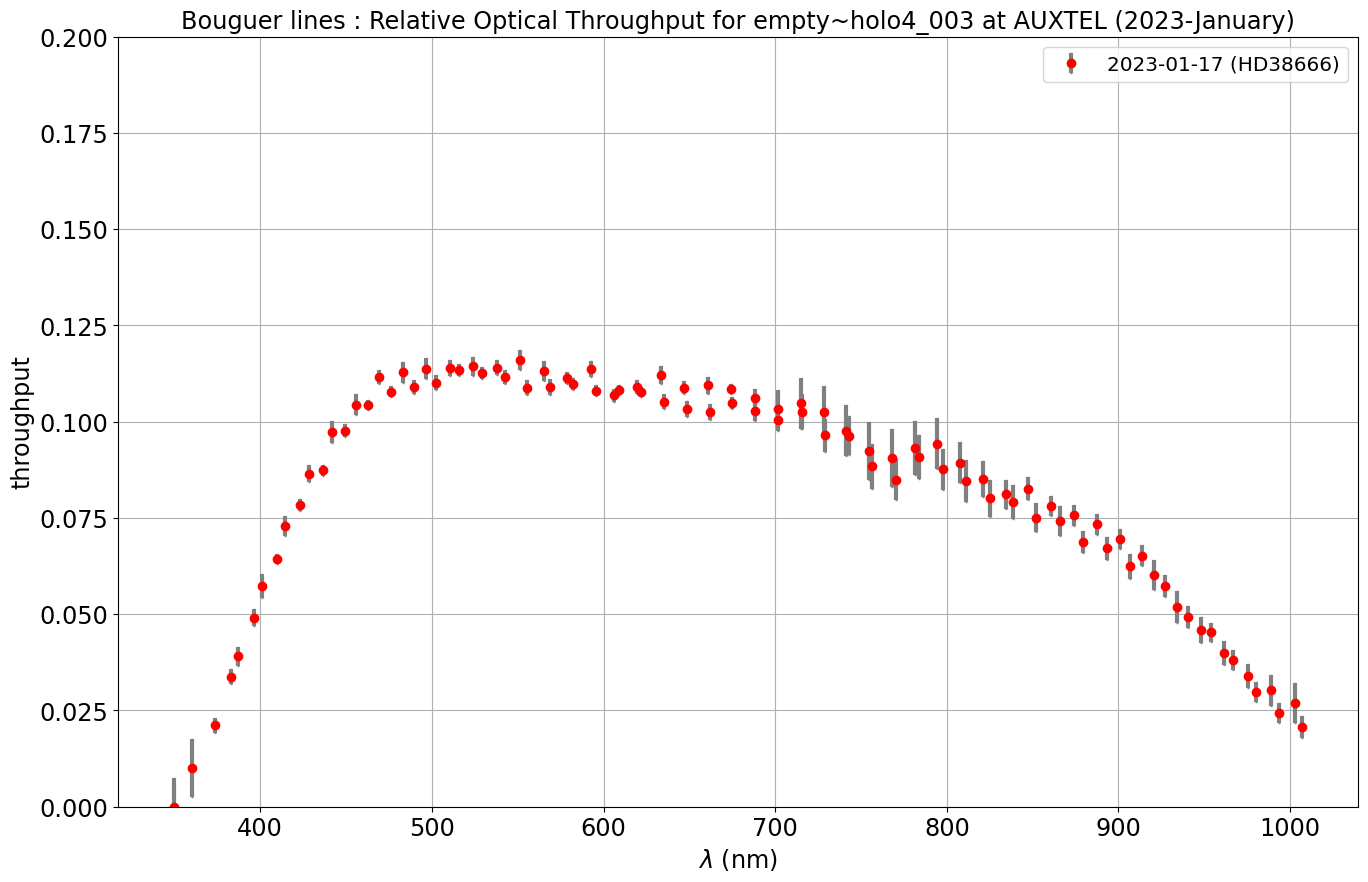

In [15]:
fig = plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

ax.errorbar(X,Y, yerr=EY, xerr=None, fmt='o',color="r",ecolor="grey", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.grid()
ax.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.set_ylim(0,0.2)
ax.legend()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("throughput")
title=f"Bouguer lines : Relative Optical Throughput for {FILTERTYPE} at {SITE} ({DATE})"
ax.set_title(title)

# Insert Last Element

In [16]:
X = np.append(X,1025)
Y = np.append(Y,0.01)
EY = np.append(EY,EY.max())


X = np.append(X,1050)
Y = np.append(Y,0.)
EY = np.append(EY,EY.max())

Text(0.5, 1.0, 'Bouguer lines : Relative Optical Throughput for empty~holo4_003 at AUXTEL (2023-January)')

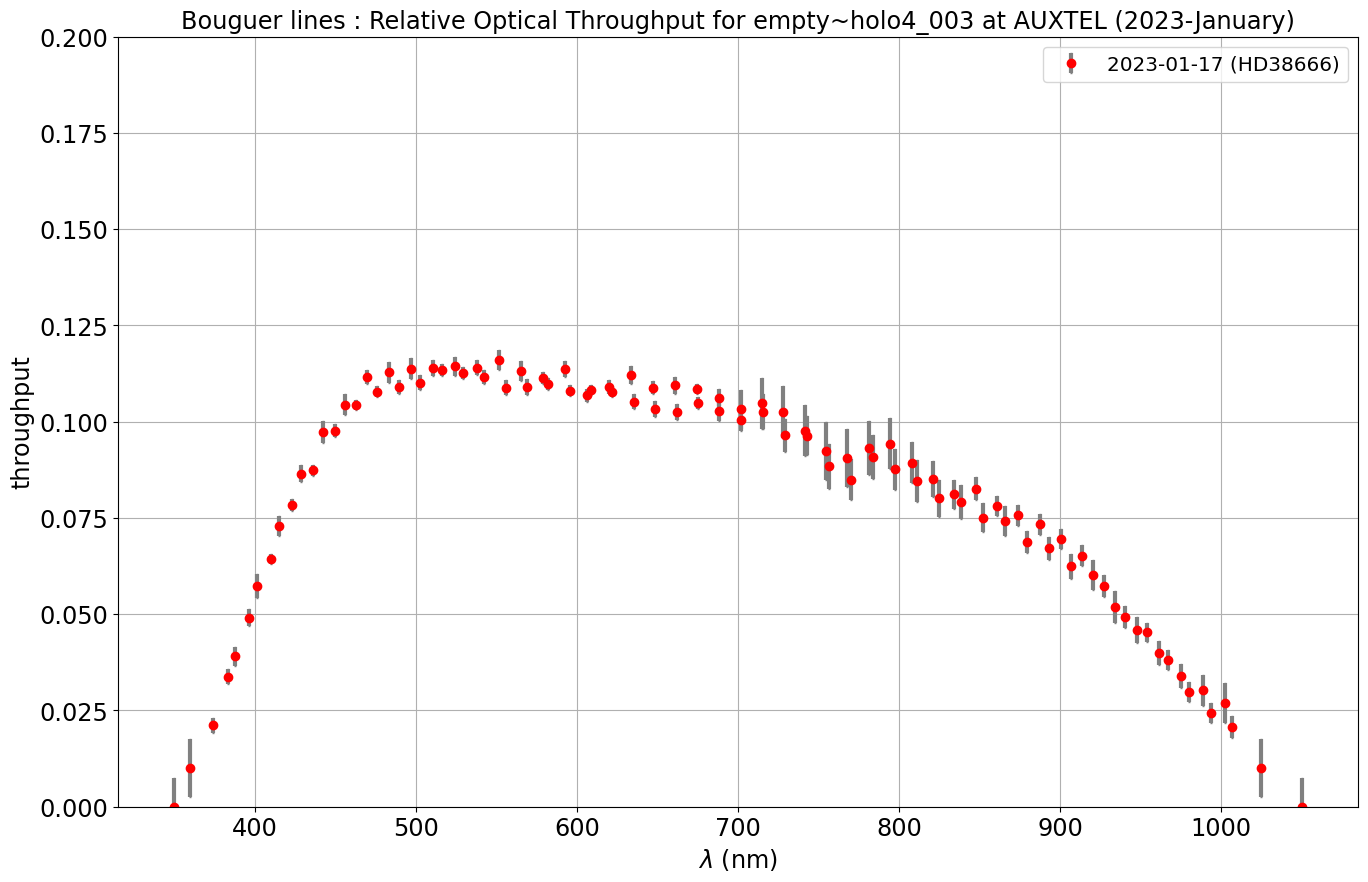

In [17]:
fig = plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

ax.errorbar(X,Y, yerr=EY, xerr=None, fmt='o',color="r",ecolor="grey", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.grid()
ax.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.set_ylim(0,0.2)
ax.legend()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("throughput")
title=f"Bouguer lines : Relative Optical Throughput for {FILTERTYPE} at {SITE} ({DATE})"
ax.set_title(title)

# Remove absorption lines

In [18]:
for key, val in abs_bands_dict.items():
    print(key,' ',val)
    wlmin = val[0]
    wlmax = val[-1]
    
    indexes = np.where(np.logical_and(X > wlmin, X<wlmax)) [0]
    print(indexes)
    
    X = np.delete(X,indexes)
    Y = np.delete(Y,indexes)
    EY = np.delete(EY,indexes)

H2O_1   [700, 740]
[50 51 52 53 54 55]
H2O_2   [800, 840]
[60 61 62 63 64 65]
H2O_3   [900, 1000]
[68 69 70 71 72 73 74 75 76 77 78 79 80 81 82]
O2_1   [760, 765]
[]


Text(0.5, 1.0, 'Bouguer lines : Relative Optical Throughput for empty~holo4_003 at AUXTEL (2023-January)')

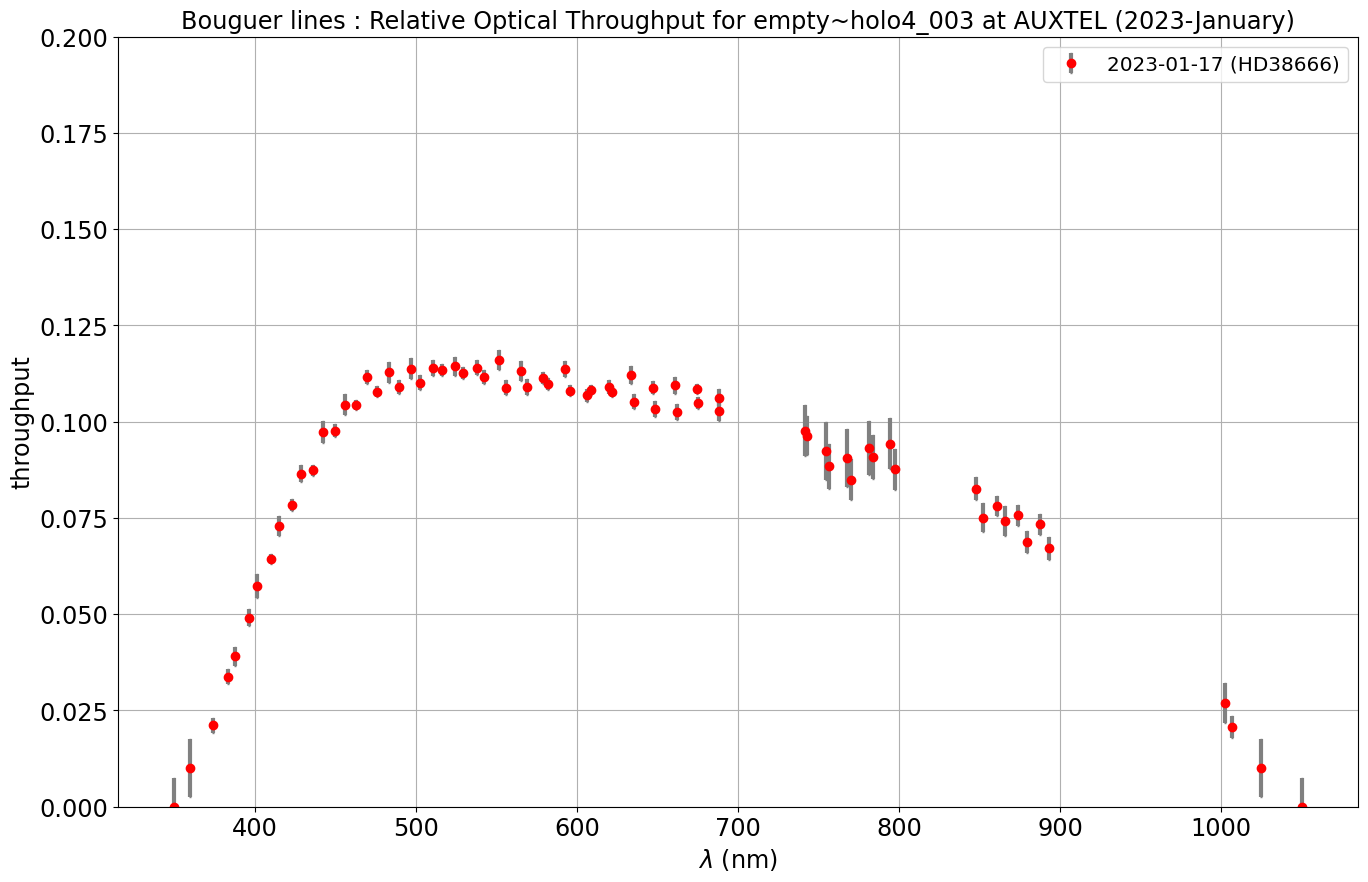

In [19]:
fig = plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

ax.errorbar(X,Y, yerr=EY, xerr=None, fmt='o',color="r",ecolor="grey", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.grid()
ax.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.set_ylim(0,0.2)
ax.legend()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("throughput")
title=f"Bouguer lines : Relative Optical Throughput for {FILTERTYPE} at {SITE} ({DATE})"
ax.set_title(title)

# Fit a gaussian process

In [20]:
dfout = pd.DataFrame()
dfout["wavelength"]=X
dfout["throu"]=Y
dfout["errthrou"]=EY

In [21]:
!ls dataout/

MLfit_bouguer_linearfit-20220630-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfit-2023-01-17-HD38666.csv
MLfit_bouguer_linearfit-2023-01-18-HD38666.csv
MLfit_bouguer_linearfit-2023-January-mucol.csv
MLfit_bouguer_linearfit-20230509-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_30nm_out.csv
MLfit_bouguer_linearfit-20230509-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfit-20230510-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfit-20230511-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfitsmoothGP-2023-January-mucol.csv


In [22]:
outputroot = outputfile_linearfit.split('-')[0]
if FLAG_POLAR:
    outputfile_linearfit=outputroot+f"-{DATE}-polar.csv"
else:
    outputfile_linearfit=outputroot+f"-{DATE}-{target}.csv" 

In [23]:
# Save CSV file
dfout.to_csv(outputfile_linearfit) 

# Fit gaussian

https://www.astroml.org/book_figures/chapter8/fig_gp_example.html


In [24]:
from sklearn.gaussian_process import GaussianProcessRegressor, kernels

In [25]:
kernel = kernels.RBF(0.5, (100, 200.0))
gp = GaussianProcessRegressor(kernel=kernel, alpha=(EY) ** 2, random_state=0)

In [26]:
gp.fit(X[:, None], Y)

x = np.arange(350.,1050.,1.)

f, f_err = gp.predict(x[:, None], return_std=True)

/Users/sylvie/mambaforge/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 200.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [27]:
# we have fit for the `h` parameter: print the result here:
print("best-fit theta =", gp.kernel_.theta)

best-fit theta = [5.29831737]


Text(0.5, 1.0, 'Bouguer lines : Relative Optical Throughput for empty~holo4_003 at AUXTEL (2023-January)')

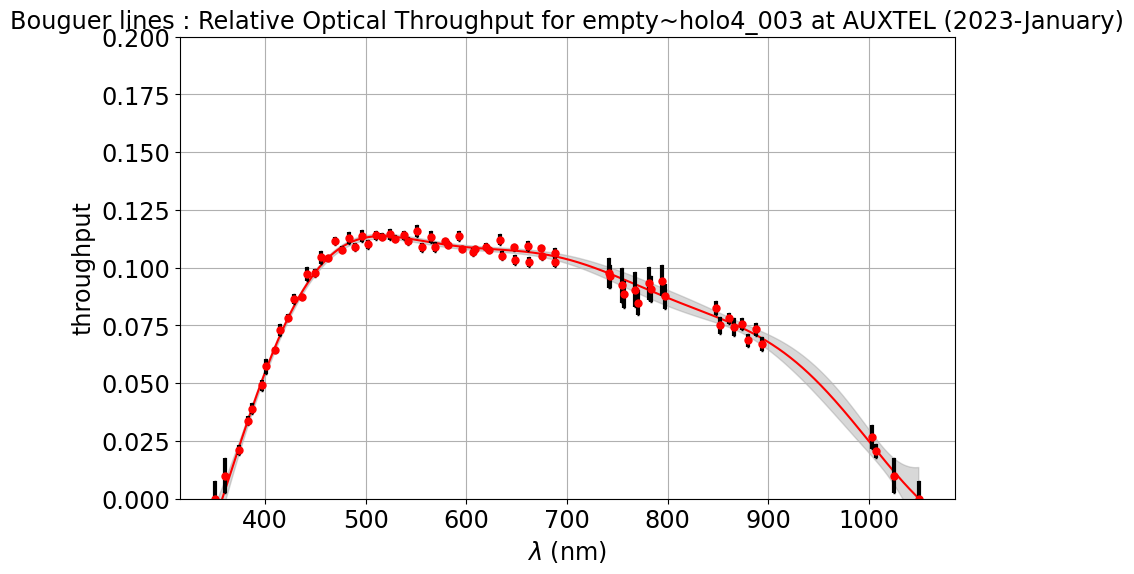

In [28]:
# third: plot a more constrained function with errors
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(x, f, '-', color='red')
ax.fill_between(x, f - 2 * f_err, f + 2 * f_err, color='gray', alpha=0.3)
ax.errorbar(X, Y, EY, fmt='o',color="r",ecolor="k", elinewidth=3, capsize=1, ms=5)
ax.set_ylim(0.,.2)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("throughput")
title=f"Bouguer lines : Relative Optical Throughput for {FILTERTYPE} at {SITE} ({DATE})"
ax.grid()
ax.set_title(title)

In [29]:
dfout = pd.DataFrame()
dfout["wavelength"]=x
dfout["throu"]=f
dfout["errthrou"]= f_err*2

In [30]:
outputroot = outputfile_linearfit.split('-')[0]
if FLAG_POLAR:
    outputfile_linearfit=outputroot+"smoothGP"+f"-{DATE}-polar-v2.csv"
else:
    outputfile_linearfit=outputroot+"smoothGP"+f"-{DATE}-{target}-v2.csv" 

In [31]:
# Save CSV file
dfout.to_csv(outputfile_linearfit) 

In [32]:
path_fit = "../../FitAtmosphericParameters/202304/dataout/throughput"

In [33]:
list_of_files  = ["throughput-2023-01-17-empty~holo4_003-psf2dffm-multifitatmparams.csv",
"throughput-2023-01-18-empty~holo4_003-psf2dffm-multifitatmparams.csv"]

In [34]:
all_df_fit = []
all_dates_fit = []
for idx,filename in enumerate(list_of_files):
    fullfilename = os.path.join(path_fit,filename)
    date = re.findall("^throughput-(.*)-empty~holo4_003-psf2dffm-multifitatmparams.csv$",filename)[0]
    
    if date != "2023-05-10":
        df_fit = pd.read_csv(fullfilename,index_col=0)
        all_df_fit.append(df_fit)
        all_dates_fit.append(date)

In [35]:
NF = len(all_df_fit)
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NF)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NF), alpha=1)

cols = ["b","g"]

Text(0.5, 1.0, 'Bouguer lines : Relative Optical Throughput for empty~holo4_003 at AUXTEL (2023-January)')

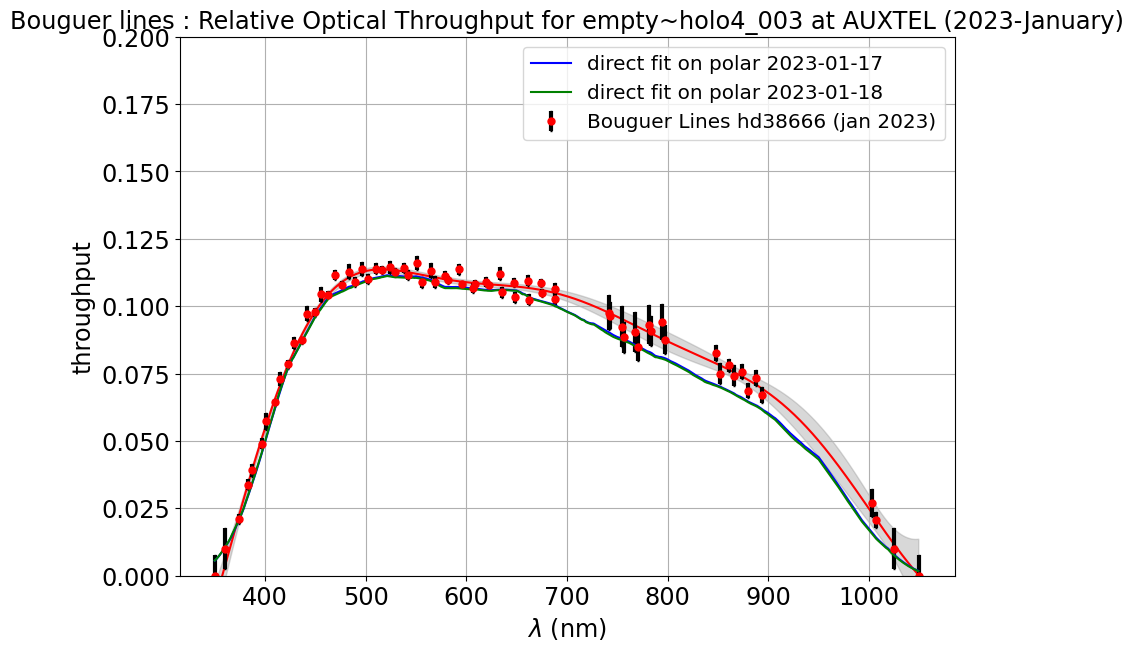

In [36]:
# third: plot a more constrained function with errors
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.plot(x, f, '-', color='red')
ax.fill_between(x, f - 2 * f_err, f + 2 * f_err, color='gray', alpha=0.3)
ax.errorbar(X, Y, EY, fmt='o',color="r",ecolor="k", elinewidth=3, capsize=1, ms=5,label="Bouguer Lines hd38666 (jan 2023)")
ax.set_ylim(0.,.2)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("throughput")


for idx in range(NF):
    wl = all_df_fit[idx]["wavelength"]
    tr = all_df_fit[idx]["newthrou"]
    tr0 = all_df_fit[idx]["oldthrou"]
    thdt = all_dates_fit[idx]
    label = "direct fit on polar " + all_dates_fit[idx] 
    
    ax.plot(wl,tr,label=label,c=cols[idx])


title=f"Bouguer lines : Relative Optical Throughput for {FILTERTYPE} at {SITE} ({DATE})"
ax.grid()
ax.legend()
ax.set_title(title)